In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import pandas as pd
from scipy.interpolate import CloughTocher2DInterpolator
from scipy.io import loadmat
%matplotlib inline

In [4]:
def ceo_modes(ceo_file):
    from collections import OrderedDict

    suit = OrderedDict()
    suit['Ni']     = np.array( 0,     dtype=np.int32)
    suit['L']      = np.array( 0,     dtype=np.double)
    suit['N_SET']  = np.array( 1,     dtype=np.int32)
    suit['N_MODE'] = np.array( 1,     dtype=np.int32)
    suit['s2b']    = np.array( [0]*7, dtype=np.int32)

    with open(ceo_file,'rb') as f:
        suit['Ni']     = np.fromfile(f, dtype=np.int32, count=1)
        suit['L']      = np.fromfile(f, dtype=np.double, count=1)
        suit['N_SET']  = np.fromfile(f, dtype=np.int32, count=1)
        suit['N_MODE'] = np.fromfile(f, dtype=np.int32, count=1)
        suit['s2b']    = np.fromfile(f, dtype=np.int32, count=7)
        suit['M']      = np.fromfile(f, dtype=np.double, count=-1)
    return suit

In [163]:
fqp = ceo_modes("ASM_DDKLs_S7OC04184_675kls.ceo")
rco = ceo_modes("M2_OrthoNormGS36p_KarhunenLoeveModes.ceo")

FileNotFoundError: [Errno 2] No such file or directory: 'M2_OrthoNormGS36p_KarhunenLoeveModes.ceo'

In [6]:
fqp_s1 = fqp['M'][:256*256*675].reshape(-1,256*256)
fqp_s7 = fqp['M'][256*256*675:].reshape(-1,256*256)

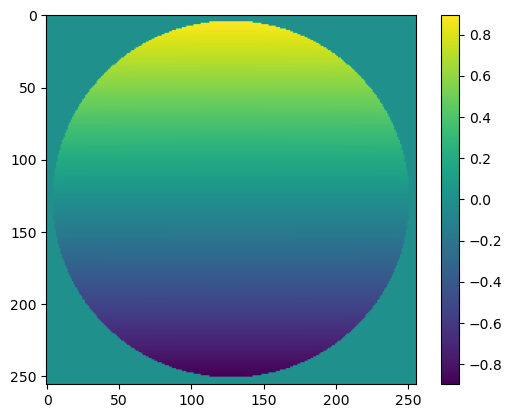

In [160]:
L = fqp['L'][0]/2
u = np.linspace(-1,1,int(fqp['Ni']))*L
x,y = np.meshgrid(u,u)
p = np.hypot(x,y)<r_max
fig,ax = plt.subplots()
h = ax.imshow(fqp_s7[1,:].reshape(256,256)*p)
fig.colorbar(h,ax=ax)

In [8]:
fqp

OrderedDict([('Ni', array([256], dtype=int32)),
             ('L', array([1.0415])),
             ('N_SET', array([2], dtype=int32)),
             ('N_MODE', array([675], dtype=int32)),
             ('s2b', array([0, 0, 0, 0, 0, 0, 1], dtype=int32)),
             ('M',
              array([0.51613252, 0.51635753, 0.5165888 , ..., 0.        , 0.        ,
                     0.        ]))])

In [9]:
rco

OrderedDict([('Ni', array([256], dtype=int32)),
             ('L', array([1.05])),
             ('N_SET', array([2], dtype=int32)),
             ('N_MODE', array([496], dtype=int32)),
             ('s2b', array([0, 0, 0, 0, 0, 0, 1], dtype=int32)),
             ('M',
              array([0.03806154, 0.03806154, 0.03806154, ..., 0.10722897, 0.10722897,
                     0.10722897]))])

In [10]:
rco_s1 = rco['M'][:256*256*496].reshape(-1,256*256)
rco_s7 = rco['M'][256*256*496:].reshape(-1,256*256)

In [11]:
0.5/0.04

12.5

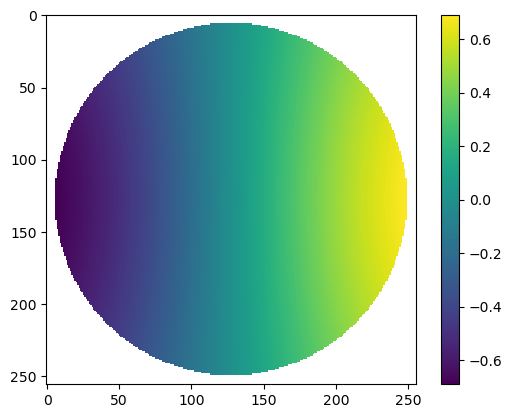

In [162]:
fig,ax = plt.subplots()
h = ax.imshow(10*rco_s1[2,:].reshape(256,256))
fig.colorbar(h,ax=ax)

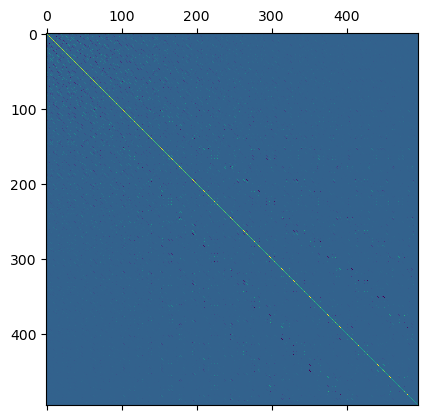

In [13]:
Q = rco_s1@rco_s1.T
plt.matshow(Q)


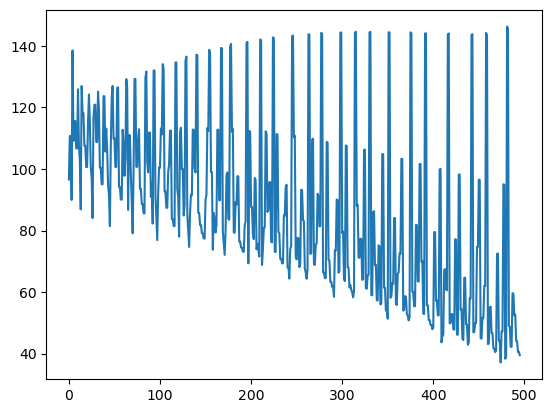

In [14]:
plt.plot(np.diag(Q))

In [123]:
data = loadmat("KLmodesGS36.mat")
data["KL_1"].shape

(675, 496)

In [131]:
np.max(data['KL_7'])

0.1857889431527126

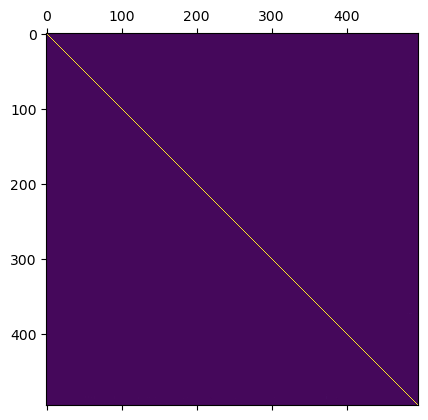

In [124]:
Q = data["KL_7"].T@data["KL_7"]
plt.matshow(Q)

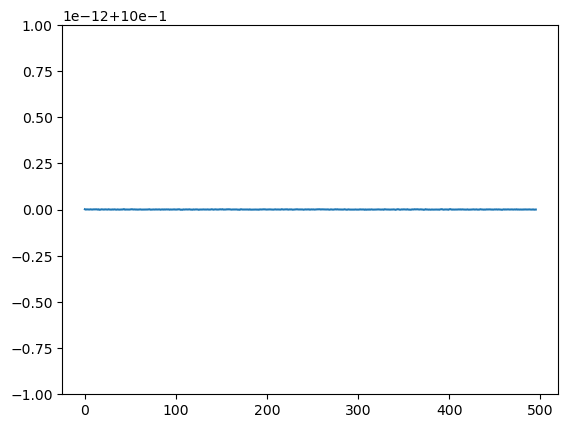

In [125]:
plt.plot(np.diag(Q))

In [116]:
nodes.shape,data['KL_1'][:,0].shape

((675, 3), (675,))

In [126]:
df = pd.read_parquet("M2_segment_axial_d.nodes.parquet")
nodes = np.vstack(df["S1"])
r = np.hypot(nodes[:,0],nodes[:,1])
r_max = r.max()
triang = tri.Triangulation(nodes[:,0],nodes[:,1])

In [127]:
rco

OrderedDict([('Ni', array([256], dtype=int32)),
             ('L', array([1.05])),
             ('N_SET', array([2], dtype=int32)),
             ('N_MODE', array([496], dtype=int32)),
             ('s2b', array([0, 0, 0, 0, 0, 0, 1], dtype=int32)),
             ('M', array([nan, nan, nan, ..., nan, nan, nan]))])

In [128]:
L = rco['L'][0]/2
u = np.linspace(-1,1,int(rco['Ni']))*L
x,y = np.meshgrid(u,u)
p = np.hypot(x,y)<r_max
e = [-L,L,-L,L]
e

[-0.525, 0.525, -0.525, 0.525]

In [122]:
pwd

'/home/rconan/Dropbox/projects/dos-actors/clients/m2-ctrl/examples/asm-nodes'

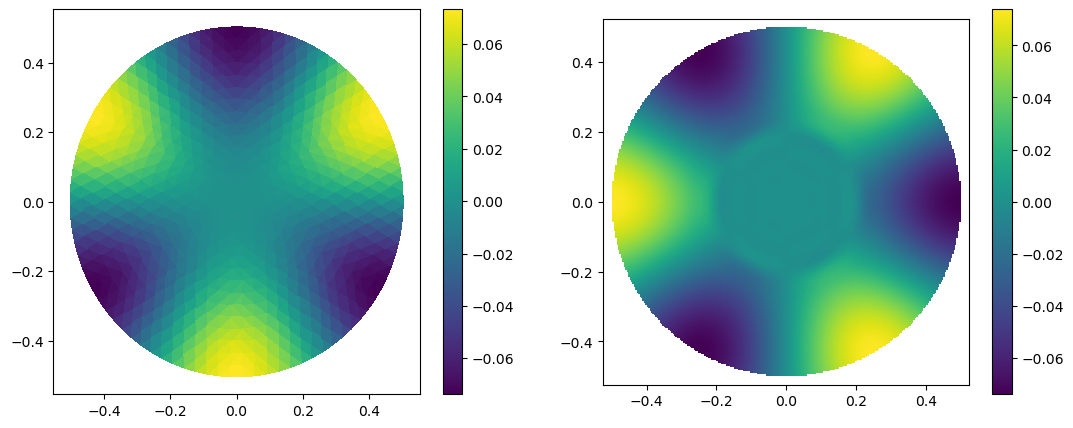

In [147]:
sid = 5
i = 7
nodes = np.vstack(df[f"S{sid}"])
r = np.hypot(nodes[:,0],nodes[:,1])
r_max = r.max()
triang = tri.Triangulation(nodes[:,0],nodes[:,1])

fig,axs  = plt.subplots(ncols=2,figsize=(13,5))
ax = axs[0]
mm = data[f'KL_{sid}'][:,i]
h = ax.tripcolor(triang,mm,vmin=mm.min(),vmax=mm.max())
#h = ax.set_aspect('equal')
fig.colorbar(h,ax=ax)
ax = axs[1]
m = rco_s7[i,:].reshape(256,256)
m[~p] = np.nan
h = ax.imshow(m,extent=e)
fig.colorbar(h,ax=ax)

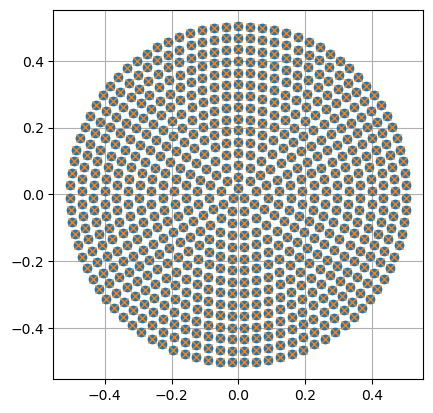

In [7]:
fig, ax = plt.subplots()
df = pd.read_parquet("M2_segment_axial_d.nodes.parquet")
nodes = np.vstack(df["S1"])
ax.plot(*nodes[:,:2].T,'o')
df = pd.read_parquet("MC_M2_VC_delta_D.nodes.parquet")
nodes = np.vstack(df["S1"])
ax.plot(*nodes[:,:2].T,'x')
ax.set_aspect('equal')
ax.grid()

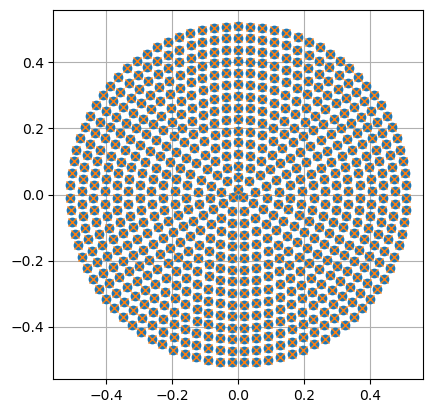

In [50]:
fig, ax = plt.subplots()
df = pd.read_parquet("M2_segment_axial_d.nodes.parquet")
nodes = np.vstack(df["S7"])
ax.plot(*nodes[:,:2].T,'o')
df = pd.read_parquet("MC_M2_VC_delta_D.nodes.parquet")
nodes = np.vstack(df["S7"])
ax.plot(*nodes[:,:2].T,'x')
ax.set_aspect('equal')
ax.grid()

In [ ]:
df = pd.read_parquet("M2_segment_axial_d.nodes.parquet")
nodes = np.vstack(df["S1"])
clough = CloughTocher2DInterpolator(nodes,s1[:500,:])